1.1

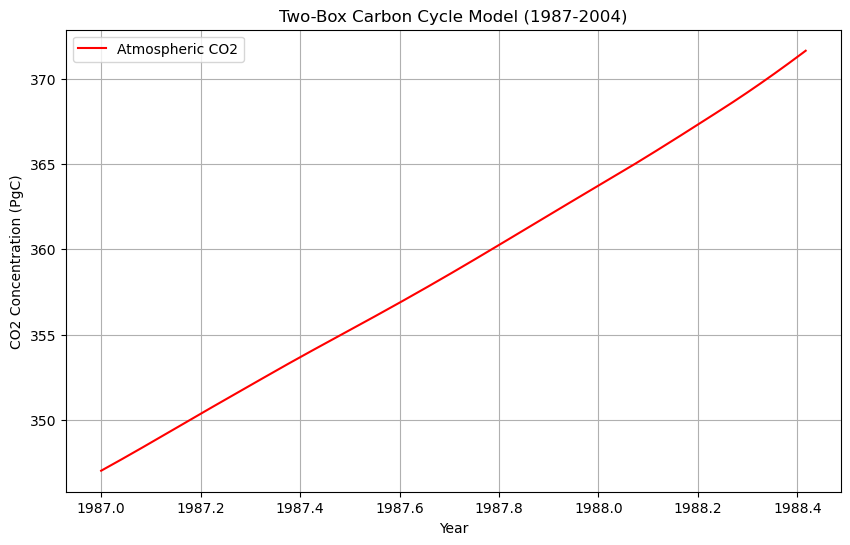

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd

# 从文件中加载gamma值
data = pd.read_csv('global.1751-2014.csv')

# 提取年份和总碳排放量（1987-2004）
gamma = data.loc[(data['Year'] >= 1987) & (data['Year'] <= 2004), 
                      ['Year', 'Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)']]

# 将单位转换成ppm
gamma['gamma'] = gamma.iloc[:, 1] / 1_000 / 2.13

# 定义一个函数来插值给定时间t的gamma值
def get_gamma(t):
    """
    Interpolate gamma value for a given time t from the data.
    """
    years = gamma['Year'] - 1987  # 将年份调整为从0开始
    gamma_values = gamma['gamma']
    return np.interp(t, years, gamma_values)

# 定义模型参数
k12 = 105 / 740  # 从大气到海洋的传输系数
k21 = 102 / 900  # 从海洋到大气的传输系数

# 微分方程
def carbon_flux(y, t):
    """
    Define the coupled differential equations.
    y[0] = N1 (atmospheric CO2)
    y[1] = N2 (ocean surface CO2)
    """
    N1, N2 = y
    
    # 获取当前时间t的gamma值
    gamma = get_gamma(t)
    
    # 模型中的方程
    dN1_dt = -k12 * N1 + k21 * N2 + gamma
    dN2_dt = k12 * N1 - k21 * N2
    
    return [dN1_dt, dN2_dt]

# 设置时间点（1987到2004）
t = np.linspace(0, 17, 204)  # 17年的月度分辨率

# 初始条件（1987年的值，单位为PgC）
N1_0 = 347  # 1987年大气中CO2浓度（PgC）
N2_0 = 422.54  # 大约海洋表面CO2（PgC）
y0 = [N1_0, N2_0]

# 解微分方程
solution = odeint(carbon_flux, y0, t)

# 提取结果
N1_solution_without_buffer = solution[:, 0]  # 大气CO2
N2_solution_without_buffer = solution[:, 1]  # 海洋表面CO2

# 创建图表
plt.figure(figsize=(10, 6))
plt.plot(1987 + t / 12, N1_solution_without_buffer, 'r-', label='Atmospheric CO2')

plt.xlabel('Year')
plt.ylabel('CO2 Concentration (PgC)')
plt.title('Two-Box Carbon Cycle Model (1987-2004)')
plt.grid(True)
plt.legend()
plt.show()

从CSV文件中读取全球CO2排放数据，筛选出1987至2004年间的数据，并将其转换成ppm单位，定义一个函数get_gamma，用于根据年份插值计算每年的CO2排放量，设定两个传输系数k12和k21，分别代表CO2从大气到海洋和从海洋到大气的，定义一个函数carbon_flux，包含描述大气CO2(N1)和海洋表层CO2(N2)变化的，创建一个时间数组t，表示从1987年到2004年的月份设定初始条件，使用odeint函数求解微分方程，得到随时变化的CO2，从而求解结提取大气CO2，绘制1987至2004年间模拟的大气CO2浓度变化曲线，并添加图表的标签、标题和图例。

1.2

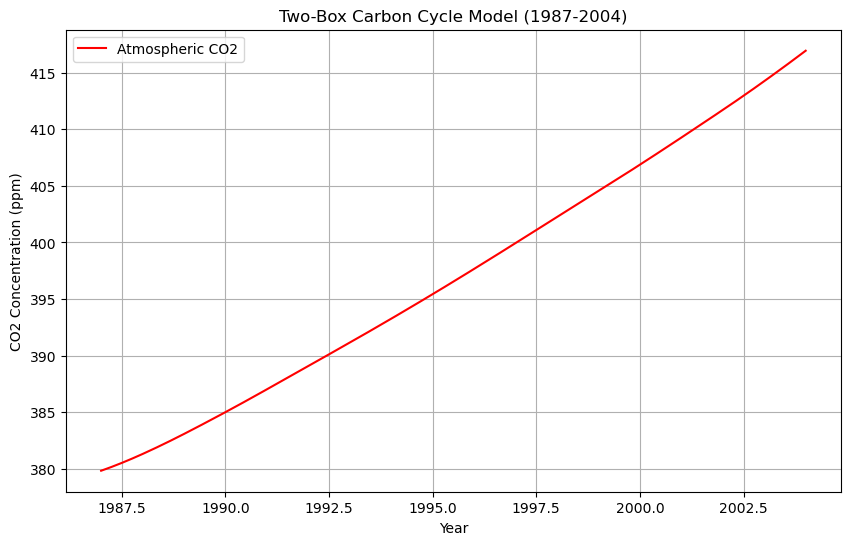

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd

# 从文件中加载gamma值
data = pd.read_csv('global.1751-2014.csv')

# 提取年份和总碳排放量（1987-2004）
gamma = data.loc[(data['Year'] >= 1987) & (data['Year'] <= 2004), 
                      ['Year', 'Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)']]

# 将排放量转换成ppm
gamma['gamma'] = gamma.iloc[:, 1] / 1000 / 2.13

# 定义一个函数来插值给定时间t的gamma值
def get_gamma(t, gamma):
    """
    Interpolate gamma value for a given time t from the data.
    """
    years = gamma['Year'] - 1987  # 将年份调整为从0开始
    gamma_values = gamma['gamma']
    return np.interp(t, years, gamma_values)

# 定义模型参数
k12 = 105 / 809  # 从大气到海洋的传输系数
k21 = 102 / 821  # 从海洋到大气的传输系数

# 平衡值
N2_eq = 821/2.13  # 海洋平衡值
xi = 3  # 示例缓冲因子

# 微分方程
def carbon_flux(y, t, gamma):
    """
    Define the coupled differential equations.
    y[0] = N1 (atmospheric CO2)
    y[1] = N2 (ocean surface CO2)
    """
    N1, N2 = y
    
    
    # 获取当前时间t的gamma值
    gamma_value = get_gamma(t, gamma)
    
    # 模型中的方程
    dN1_dt = -k12 * N1 + k21 * (N2_eq + xi * (N2 - N2_eq)) + gamma_value
    dN2_dt = k12 * N1 - k21 * (N2_eq + xi * (N2 - N2_eq))
    
    return [dN1_dt, dN2_dt]

# 设置时间点（1987到2004）
t = np.linspace(0, 17, 204)  # 17年的月度分辨率

# 初始条件（1987年的值，单位为ppm）
N1_0 = 809/2.13  # 1987年大气中CO2浓度
N2_0 = 821/2.13  # 大约海洋表面CO2
y0 = [N1_0, N2_0]

# 解微分方程
solution = odeint(carbon_flux, y0, t, args=(gamma,))

# 提取结果
N1_solution_with_buffer = solution[:, 0]  # 大气CO2
N2_solution_with_buffer = solution[:, 1]  # 海洋表面CO2

# 创建图表
plt.figure(figsize=(10, 6))
plt.plot(1987 + t, N1_solution_with_buffer, 'r-', label='Atmospheric CO2')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.title('Two-Box Carbon Cycle Model (1987-2004)')
plt.grid(True)
plt.legend()
plt.show()

从CSV文件中加载全球CO2排放数据，提取1987年至2004年间的数据，并转换单位，定义get_gamma函数，用于根据年份t插值计算每年的CO2排放量。定义carbon_flux函数，包含描述大气CO2（N1）和海洋表面CO2（N2）变化的耦合微分方程，创建一个时间数组t，表示从1987年到2004年的时间点，以月为单位。设定1987年初大气和海洋表面的CO2初始浓度。使用odeint函数求解微分方程，得到随时间变化的大气和海洋表面CO2浓度，从求解结果中提取大气CO2浓度和海洋表面CO2浓度，绘制1987年至2004年间模拟的大气CO2浓度变化曲线，并添加图表的标签、标题和图例。

1.3

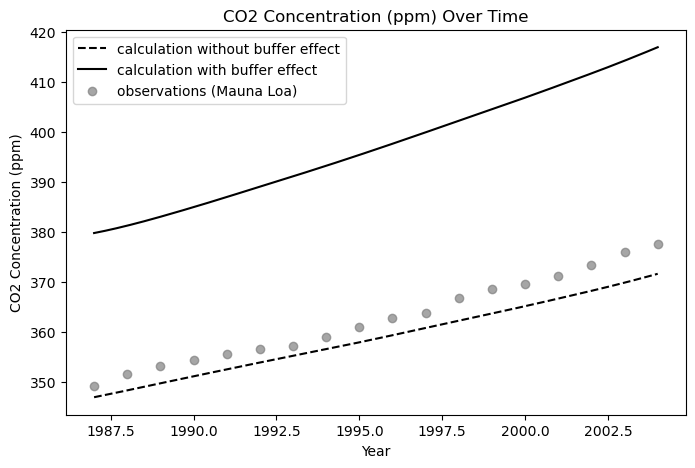

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 加载观测数据
obs_data = pd.read_csv('co2_annmean_mlo.csv')

# 筛选1987年到2004年的观测数据
obs_data_filtered = obs_data[(obs_data['year'] >= 1987) & (obs_data['year'] <= 2004)]

# 提取筛选后的年份和CO2浓度
filtered_years = obs_data_filtered['year']
filtered_co2 = obs_data_filtered['mean']

# 绘制图形
plt.figure(figsize=(8, 5))
plt.plot(1987 + t, N1_solution_without_buffer, 'k--', label='calculation without buffer effect')
plt.plot(1987 + t, N1_solution_with_buffer, 'k-', label='calculation with buffer effect')
plt.scatter(filtered_years, filtered_co2, color='gray', label='observations (Mauna Loa)', alpha=0.7)

# 添加图例
plt.legend()

# 添加标题和轴标签
plt.title('CO2 Concentration (ppm) Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')

# 显示图形
plt.show()

首先，加载CSV文件，该文件包含了CO2的年平均浓度观测数据。接着，筛选出了1987年到2004年之间的数据，并提取了这些年份和对应的CO2浓度。然后，使用matplotlib库来绘制两组计算得到的CO2浓度随时间变化的曲线（一组考虑了缓冲效应，另一组没有考虑），以及实际观测数据的散点图。两组数据分别代表没有和有缓冲效应的CO2浓度模型预测值，最后，代码添加图例、标题和轴标签，并使用`plt.show()`显示最终的图形。显示最终的图表。